In [139]:
import geopandas as gpd
import pandas as pd
from sqlalchemy import create_engine
from haversine import haversine
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [140]:
from sklearn.preprocessing import LabelEncoder

In [141]:
endpoint = 'dao.cdqd2bwz9q4s.ap-northeast-2.rds.amazonaws.com'
schema = 'dao'
db_connection_str = 'mysql+pymysql://admin:ekfkawnl@{}/{}'.format(endpoint, schema)
try :
    db_connection = create_engine(db_connection_str)
    conn = db_connection.connect()
except :
    print('fail to connect db')

def load_data_from_rds(tabel_name):
  sql = "SELECT * FROM {}".format(tabel_name)
  df = pd.read_sql(sql, db_connection)
  return df

In [171]:
df = load_data_from_rds('MainData_현수')
df

,번호,생태통로명,주소,도로명,도로번호,차선_수,위도_도분초,경도_도분초,위도_십진법,경도_십진법,...,모니터링기간,모니터링방법,등산객이용빈도,모니터링신뢰도,생태통로효율성,"이용확인종,이용빈도높은종,멸종위기종이용빈도",개선필요사항,면적_m^2,너비_m,길이_m
0,1495,가계통로,경상남도 산청군 생비량면 가계리 산279-3,일반국도,20호선,왕복4차선,35 21 36.68,128 3 49.5,35.36019,128.06375,...,2017.07.17. ~ 2017.07.28.,None,극히 적음,추가 조사가 있어야 본 생태통로의 효율성 판단이 가능함,판단 불가,None,None,NaN,NaN,NaN
1,1277,가대리,충청북도 단양군 가곡면 가대리,국도,59호선,왕복2차선,37 2 2.7,128 24 23.8,37.03408,128.40661,...,2016.01.01. ~ 2016.09.20.,None,None,추가 조사가 있어야 본 생태통로의 효율성 판단이 가능함,판단 불가,None,None,NaN,NaN,NaN
2,1278,가산리,충청북도 단양군 단성면 가산리,국도,59호선,왕복2차선,36 53 53.957575979628,128 18 20.275238032704,36.89832,128.30563,...,2016.01.01. ~ 2016.09.20.,None,None,추가 조사가 있어야 본 생태통로의 효율성 판단이 가능함,판단 불가,종명: 고라니 이용확인종: 1 이용빈도 순위: 멸종위기종 이용빈도 :\n종명: ...,None,NaN,NaN,NaN
3,1279,가산리2,충청북도 단양군 단성면 가산리,국도,59호선,왕복2차선,36 53 48.718150112868,128 18 20.917315490112,36.89687,128.30581,...,2016.01.01. ~ 2016.09.20.,None,None,추가 조사가 있어야 본 생태통로의 효율성 판단이 가능함,판단 불가,종명: 고라니 이용확인종: 1 이용빈도 순위: 멸종위기종 이용빈도 :\n종명: ...,None,NaN,NaN,NaN
4,1090,각리,충청북도 청원군 오창읍 각리,지방도,540호,왕복6차선,36 42 48.1,127 25 19.2,36.71336,127.42200,...,2016.09.01. ~ 2016.09.30.,None,매일 다수,추가 조사가 있어야 본 생태통로의 효율성 판단이 가능함,보통(주 35회 야생동물 이용),종명: 개 이용확인종: 1 이용빈도 순위: 멸종위기종 이용빈도 :\n종명: 고양...,#NAME?,312.74,8.23,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,1089,None,충청북도 청주시 청원구 오창읍 각리,과학산업2로,구룡리 472도,왕복6차선,36 42 46.0,127 25 14.0,36.71278,127.42056,...,2016.09.26. ~ 2016.09.30.,None,None,금번 조사는 본 생태통로의 효율성에 대한 판단이 가능한 수준이었음,판단 불가,종명: 고라니 이용확인종: 1 이용빈도 순위: 멸종위기종 이용빈도 :\n종명: ...,#NAME?,674.31,13.30,50.7
505,1087,None,충청북도 청주시 청원구 오창읍 구룡리,오창공원로,구룡리 442도,왕복4차선,36 43 2.0,127 25 4.0,36.71722,127.41778,...,2016.09.26. ~ 2016.09.30.,None,매일 다수,금번 조사는 본 생태통로의 효율성에 대한 판단이 가능한 수준이었음,판단 불가,종명: 고라니 이용확인종: 1 이용빈도 순위: 멸종위기종 이용빈도 :\n종명: ...,#NAME?,526.32,13.60,38.7
506,1088,None,충청북도 청주시 청원구 오창읍 양청리,오창공원로,양청리 882도(호수공원 주변),왕복4차선,36 42 44.0,127 25 31.0,36.71222,127.42528,...,2016.09.26. ~ 2016.09.30.,None,매일 다수,금번 조사는 본 생태통로의 효율성에 대한 판단이 가능한 수준이었음,판단 불가,종명: 고라니 이용확인종: 1 이용빈도 순위: 멸종위기종 이용빈도 :\n종명: ...,#NAME?,674.31,13.30,50.7
507,1091,None,충청북도 청주시 청원구 오창읍 여천리,리도,213호선,왕복2차선,36 46 3.0,127 28 24.0,36.76750,127.47333,...,2016.09.26. ~ 2016.09.30.,None,None,금번 조사는 본 생태통로의 효율성에 대한 판단이 가능한 수준이었음,판단 불가,종명: 멧돼지 이용확인종: 1 이용빈도 순위: 멸종위기종 이용빈도 :\n종명: ...,#NAME?,140.00,7.00,20.0


In [172]:
df.isnull().sum()

번호                           0
생태통로명                      124
주소                           0
도로명                          9
도로번호                        21
차선_수                         0
위도_도분초                       0
경도_도분초                       0
위도_십진법                       0
경도_십진법                       0
num                         12
도로                          13
생태통로타입                      12
준공년도                        15
모니터링기간                     102
모니터링방법                     351
등산객이용빈도                    283
모니터링신뢰도                    104
생태통로효율성                     92
이용확인종,이용빈도높은종,멸종위기종이용빈도    298
개선필요사항                     312
면적_m^2                     269
너비_m                       269
길이_m                       269
dtype: int64

컬럼명

In [173]:
col = list(df.columns)
col

['번호',
 '생태통로명',
 '주소',
 '도로명',
 '도로번호',
 '차선_수',
 '위도_도분초',
 '경도_도분초',
 '위도_십진법',
 '경도_십진법',
 'num',
 '도로',
 '생태통로타입',
 '준공년도',
 '모니터링기간',
 '모니터링방법',
 '등산객이용빈도',
 '모니터링신뢰도',
 '생태통로효율성',
 '이용확인종,이용빈도높은종,멸종위기종이용빈도',
 '개선필요사항',
 '면적_m^2',
 '너비_m',
 '길이_m']

# 이용확인종 문자열 처리

In [174]:
monitored = df[col[-5]].to_list()

In [175]:
monitored = [x.split('\n') if x is not None else x for x in monitored]
for i, m in enumerate(monitored):
    if m is None :
        continue
    else:
        monitored[i] = [x.split('이용확인종')[0].split()[-1] for x in m]
print(monitored)

[None, None, ['고라니', '멧돼지', '파충류'], ['고라니', '멧돼지', '파충류'], ['개', '고양이', '다람쥐'], ['고라니', '너구리', '멧돼지', '다람쥐'], None, ['고라니', '너구리', '멧돼지'], None, None, None, None, None, None, None, None, None, None, ['다람쥐', '고라니'], ['고라니', '청설모'], None, ['개구리', '고라니', '너구리'], None, None, ['다람쥐', '고라니', '멧돼지'], None, None, None, ['고라니'], None, None, None, None, None, None, ['산양', '삵', '담비', '노루', '멧돼지', '너구리', '다람쥐', '고라니', '청설모', '고양이', '오소리', '흰배지빠귀', '조류', '들꿩', '멧비둘기'], ['고라니', '너구리'], None, None, ['삵', '너구리', '고라니'], None, None, None, ['멧돼지', '고라니'], None, None, None, None, None, ['고라니'], ['고라니', '멧돼지'], None, ['개', '고양이'], None, None, None, None, None, ['개', '조류'], None, ['너구리', '다람쥐', '고라니'], ['고라니', '멧돼지'], None, ['고라니', '너구리', '멧돼지'], None, ['고라니', '너구리', '삵', '멧돼지'], ['고라니', '두꺼비', '너구리', '개구리'], ['고라니', '너구리', '멧돼지'], ['고라니', '멧돼지'], ['고라니', '너구리', '고양이'], ['고양이'], None, None, None, None, ['고라니', '너구리', '멧돼지'], ['고라니', '너구리', '멧돼지'], ['고라니', '멧토끼'], ['너구리', '고라니', '멧돼지'], None, None, None, ['

In [176]:
df[col[-5]]=monitored
df

,번호,생태통로명,주소,도로명,도로번호,차선_수,위도_도분초,경도_도분초,위도_십진법,경도_십진법,...,모니터링기간,모니터링방법,등산객이용빈도,모니터링신뢰도,생태통로효율성,"이용확인종,이용빈도높은종,멸종위기종이용빈도",개선필요사항,면적_m^2,너비_m,길이_m
0,1495,가계통로,경상남도 산청군 생비량면 가계리 산279-3,일반국도,20호선,왕복4차선,35 21 36.68,128 3 49.5,35.36019,128.06375,...,2017.07.17. ~ 2017.07.28.,None,극히 적음,추가 조사가 있어야 본 생태통로의 효율성 판단이 가능함,판단 불가,None,None,NaN,NaN,NaN
1,1277,가대리,충청북도 단양군 가곡면 가대리,국도,59호선,왕복2차선,37 2 2.7,128 24 23.8,37.03408,128.40661,...,2016.01.01. ~ 2016.09.20.,None,None,추가 조사가 있어야 본 생태통로의 효율성 판단이 가능함,판단 불가,None,None,NaN,NaN,NaN
2,1278,가산리,충청북도 단양군 단성면 가산리,국도,59호선,왕복2차선,36 53 53.957575979628,128 18 20.275238032704,36.89832,128.30563,...,2016.01.01. ~ 2016.09.20.,None,None,추가 조사가 있어야 본 생태통로의 효율성 판단이 가능함,판단 불가,"[고라니, 멧돼지, 파충류]",None,NaN,NaN,NaN
3,1279,가산리2,충청북도 단양군 단성면 가산리,국도,59호선,왕복2차선,36 53 48.718150112868,128 18 20.917315490112,36.89687,128.30581,...,2016.01.01. ~ 2016.09.20.,None,None,추가 조사가 있어야 본 생태통로의 효율성 판단이 가능함,판단 불가,"[고라니, 멧돼지, 파충류]",None,NaN,NaN,NaN
4,1090,각리,충청북도 청원군 오창읍 각리,지방도,540호,왕복6차선,36 42 48.1,127 25 19.2,36.71336,127.42200,...,2016.09.01. ~ 2016.09.30.,None,매일 다수,추가 조사가 있어야 본 생태통로의 효율성 판단이 가능함,보통(주 35회 야생동물 이용),"[개, 고양이, 다람쥐]",#NAME?,312.74,8.23,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,1089,None,충청북도 청주시 청원구 오창읍 각리,과학산업2로,구룡리 472도,왕복6차선,36 42 46.0,127 25 14.0,36.71278,127.42056,...,2016.09.26. ~ 2016.09.30.,None,None,금번 조사는 본 생태통로의 효율성에 대한 판단이 가능한 수준이었음,판단 불가,"[고라니, 멧돼지]",#NAME?,674.31,13.30,50.7
505,1087,None,충청북도 청주시 청원구 오창읍 구룡리,오창공원로,구룡리 442도,왕복4차선,36 43 2.0,127 25 4.0,36.71722,127.41778,...,2016.09.26. ~ 2016.09.30.,None,매일 다수,금번 조사는 본 생태통로의 효율성에 대한 판단이 가능한 수준이었음,판단 불가,"[고라니, 멧돼지]",#NAME?,526.32,13.60,38.7
506,1088,None,충청북도 청주시 청원구 오창읍 양청리,오창공원로,양청리 882도(호수공원 주변),왕복4차선,36 42 44.0,127 25 31.0,36.71222,127.42528,...,2016.09.26. ~ 2016.09.30.,None,매일 다수,금번 조사는 본 생태통로의 효율성에 대한 판단이 가능한 수준이었음,판단 불가,"[고라니, 멧돼지]",#NAME?,674.31,13.30,50.7
507,1091,None,충청북도 청주시 청원구 오창읍 여천리,리도,213호선,왕복2차선,36 46 3.0,127 28 24.0,36.76750,127.47333,...,2016.09.26. ~ 2016.09.30.,None,None,금번 조사는 본 생태통로의 효율성에 대한 판단이 가능한 수준이었음,판단 불가,"[멧돼지, 고라니]",#NAME?,140.00,7.00,20.0


이용확인 종의 종수를 별도의 열로 분리

In [177]:
df['이용확인 종 수'] = [len(x) if x is not None else 0 for x in df[col[-5]]]
df

,번호,생태통로명,주소,도로명,도로번호,차선_수,위도_도분초,경도_도분초,위도_십진법,경도_십진법,...,모니터링방법,등산객이용빈도,모니터링신뢰도,생태통로효율성,"이용확인종,이용빈도높은종,멸종위기종이용빈도",개선필요사항,면적_m^2,너비_m,길이_m,이용확인 종 수
0,1495,가계통로,경상남도 산청군 생비량면 가계리 산279-3,일반국도,20호선,왕복4차선,35 21 36.68,128 3 49.5,35.36019,128.06375,...,None,극히 적음,추가 조사가 있어야 본 생태통로의 효율성 판단이 가능함,판단 불가,None,None,NaN,NaN,NaN,0
1,1277,가대리,충청북도 단양군 가곡면 가대리,국도,59호선,왕복2차선,37 2 2.7,128 24 23.8,37.03408,128.40661,...,None,None,추가 조사가 있어야 본 생태통로의 효율성 판단이 가능함,판단 불가,None,None,NaN,NaN,NaN,0
2,1278,가산리,충청북도 단양군 단성면 가산리,국도,59호선,왕복2차선,36 53 53.957575979628,128 18 20.275238032704,36.89832,128.30563,...,None,None,추가 조사가 있어야 본 생태통로의 효율성 판단이 가능함,판단 불가,"[고라니, 멧돼지, 파충류]",None,NaN,NaN,NaN,3
3,1279,가산리2,충청북도 단양군 단성면 가산리,국도,59호선,왕복2차선,36 53 48.718150112868,128 18 20.917315490112,36.89687,128.30581,...,None,None,추가 조사가 있어야 본 생태통로의 효율성 판단이 가능함,판단 불가,"[고라니, 멧돼지, 파충류]",None,NaN,NaN,NaN,3
4,1090,각리,충청북도 청원군 오창읍 각리,지방도,540호,왕복6차선,36 42 48.1,127 25 19.2,36.71336,127.42200,...,None,매일 다수,추가 조사가 있어야 본 생태통로의 효율성 판단이 가능함,보통(주 35회 야생동물 이용),"[개, 고양이, 다람쥐]",#NAME?,312.74,8.23,38.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,1089,None,충청북도 청주시 청원구 오창읍 각리,과학산업2로,구룡리 472도,왕복6차선,36 42 46.0,127 25 14.0,36.71278,127.42056,...,None,None,금번 조사는 본 생태통로의 효율성에 대한 판단이 가능한 수준이었음,판단 불가,"[고라니, 멧돼지]",#NAME?,674.31,13.30,50.7,2
505,1087,None,충청북도 청주시 청원구 오창읍 구룡리,오창공원로,구룡리 442도,왕복4차선,36 43 2.0,127 25 4.0,36.71722,127.41778,...,None,매일 다수,금번 조사는 본 생태통로의 효율성에 대한 판단이 가능한 수준이었음,판단 불가,"[고라니, 멧돼지]",#NAME?,526.32,13.60,38.7,2
506,1088,None,충청북도 청주시 청원구 오창읍 양청리,오창공원로,양청리 882도(호수공원 주변),왕복4차선,36 42 44.0,127 25 31.0,36.71222,127.42528,...,None,매일 다수,금번 조사는 본 생태통로의 효율성에 대한 판단이 가능한 수준이었음,판단 불가,"[고라니, 멧돼지]",#NAME?,674.31,13.30,50.7,2
507,1091,None,충청북도 청주시 청원구 오창읍 여천리,리도,213호선,왕복2차선,36 46 3.0,127 28 24.0,36.76750,127.47333,...,None,None,금번 조사는 본 생태통로의 효율성에 대한 판단이 가능한 수준이었음,판단 불가,"[멧돼지, 고라니]",#NAME?,140.00,7.00,20.0,2


# 생태통로 효율성 EDA

In [178]:
df[((df['생태통로효율성']=='판단 불가') | (df['생태통로효율성'].isnull())) & (df[col[-5]].notnull())]

,번호,생태통로명,주소,도로명,도로번호,차선_수,위도_도분초,경도_도분초,위도_십진법,경도_십진법,...,모니터링방법,등산객이용빈도,모니터링신뢰도,생태통로효율성,"이용확인종,이용빈도높은종,멸종위기종이용빈도",개선필요사항,면적_m^2,너비_m,길이_m,이용확인 종 수
2,1278,가산리,충청북도 단양군 단성면 가산리,국도,59호선,왕복2차선,36 53 53.957575979628,128 18 20.275238032704,36.89832,128.30563,...,None,None,추가 조사가 있어야 본 생태통로의 효율성 판단이 가능함,판단 불가,"[고라니, 멧돼지, 파충류]",None,NaN,NaN,NaN,3
3,1279,가산리2,충청북도 단양군 단성면 가산리,국도,59호선,왕복2차선,36 53 48.718150112868,128 18 20.917315490112,36.89687,128.30581,...,None,None,추가 조사가 있어야 본 생태통로의 효율성 판단이 가능함,판단 불가,"[고라니, 멧돼지, 파충류]",None,NaN,NaN,NaN,3
7,1453,갈비재,경상북도 청송군 파천면 신흥리 852,군도,금곡2-신흥,왕복2차선,36 24 24.875658826524003,129 2 49.691009522399995,36.40691,129.04714,...,None,None,None,None,"[고라니, 너구리, 멧돼지]",None,462.52,37.3,12.4,3
52,1197,남봉,전라북도 완주군 고산면 남봉리 산44-1,국도,17호선,왕복4차선,35 57 56.42,127 11 38.54,35.96567,127.19404,...,None,극히 적음,환경영향평가 대상사업으로 도로건설에 따른 생태통로 설치,판단 불가,"[개, 고양이]",#NAME?,NaN,NaN,NaN,2
61,1047,노채고개,경기도 포천시 일동면 기산리,하면~일동,387,왕복2차선,37 55 42.0,127 20 17.0,37.92517,127.33807,...,None,None,금번 조사는 본 생태통로의 효율성에 대한 판단이 가능한 수준이었음,판단 불가,"[고라니, 멧돼지]",None,825.44,61.6,13.4,2
63,1452,논골재,경상북도 청송군 파천면 신기리 산41-7,군도,송강-옹점,왕복2차선,36 28 58.45,129 3 41.41,36.48290,129.06150,...,None,None,None,None,"[고라니, 너구리, 멧돼지]",None,498.96,18.9,26.4,3
91,1022,도곡리 생태통로,경기도 남양주시 와부읍 도곡리,군도,13호선,왕복2차선,37 35 24.87,127 14 3.38,37.59024,127.23427,...,기타,매일 다수,금번 조사는 본 생태통로의 효율성에 대한 판단이 가능한 수준이었음,판단 불가,"[멧돼지, 고라니]",#NAME?,NaN,NaN,NaN,2
93,1146,도래기재 생태통로,경상북도 봉화군 춘양면 우구치리,국지도,88호선,왕복2차선,37 2 20.3159126420016,128 47 50.45326422381576,37.03898,128.79735,...,기타,None,금번 조사는 본 생태통로의 효율성에 대한 판단이 가능한 수준이었음,판단 불가,"[고라니, 너구리]",생태통로 시설 양호하여 개선사항 없음.,352.92,20.4,17.3,2
107,1200,두여,전라북도 익산시 여산면 두여리 산1-1,국도,1호선,왕복4차선,36 4 19.5,127 5 24.03,36.07208,127.09001,...,None,극히 적음,환경영향평가 대상사업으로 도로건설에 따른 생태통로 설치,판단 불가,"[고라니, 멧돼지]",#NAME?,1260.96,42.6,29.6,2
119,1382,무안광주선 16.94k,전라남도 함평군 학교면 마산리,무안광주선,(고속국도 10호선),왕복4차선,35 3 27.91,126 33 21.59,35.05775,126.55600,...,None,None,금번 조사는 본 생태통로의 효율성에 대한 판단이 가능한 수준이었음,판단 불가,"[개, 고양이]",None,NaN,NaN,NaN,2


In [179]:
df.groupby('생태통로효율성')['번호'].count()

생태통로효율성
낮음(주 2회 이하 야생동물 이용)    101
높음(거의 매일 야생동물 이용)       90
보통(주 35회 야생동물 이용)       67
판단 불가                  159
Name: 번호, dtype: int64

In [180]:
plot = df[['번호', '생태통로효율성', '이용확인 종 수']]
plot = plot[(plot['생태통로효율성'].notnull()) & (plot['이용확인 종 수']>0)]
plot

,번호,생태통로효율성,이용확인 종 수
2,1278,판단 불가,3
3,1279,판단 불가,3
4,1090,보통(주 35회 야생동물 이용),3
5,1023,높음(거의 매일 야생동물 이용),4
18,1066,보통(주 35회 야생동물 이용),2
...,...,...,...
504,1089,판단 불가,2
505,1087,판단 불가,2
506,1088,판단 불가,2
507,1091,판단 불가,2


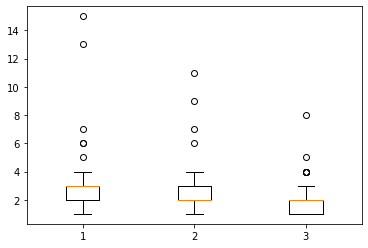

In [181]:
plt.boxplot(x=[plot.loc[plot['생태통로효율성']=='높음(거의 매일 야생동물 이용)', '이용확인 종 수'],
                plot.loc[plot['생태통로효율성']=='보통(주 35회 야생동물 이용)', '이용확인 종 수'],
                plot.loc[plot['생태통로효율성']=='낮음(주 2회 이하 야생동물 이용)', '이용확인 종 수']
                ])
plt.show()

In [182]:
df['생태통로효율성'].unique()

array(['판단 불가', '보통(주 35회 야생동물 이용)', '높음(거의 매일 야생동물 이용)', None,
       '낮음(주 2회 이하 야생동물 이용)'], dtype=object)

In [183]:
eff_preprocess_index = list(df[((df['생태통로효율성']=='판단 불가') | df['생태통로효율성'].isnull()) & (df['이용확인 종 수']>0)].index)
eff_preprocess_dict = {
    1: '낮음',
    2: '낮음',
    3: '보통',
    4: '높음',
    5: '높음'
}
for idx in eff_preprocess_index:
    df.loc[idx, '생태통로효율성']=eff_preprocess_dict[df.loc[idx,'이용확인 종 수']]

df[df.index.isin(eff_preprocess_index)]

,번호,생태통로명,주소,도로명,도로번호,차선_수,위도_도분초,경도_도분초,위도_십진법,경도_십진법,...,모니터링방법,등산객이용빈도,모니터링신뢰도,생태통로효율성,"이용확인종,이용빈도높은종,멸종위기종이용빈도",개선필요사항,면적_m^2,너비_m,길이_m,이용확인 종 수
2,1278,가산리,충청북도 단양군 단성면 가산리,국도,59호선,왕복2차선,36 53 53.957575979628,128 18 20.275238032704,36.89832,128.30563,...,None,None,추가 조사가 있어야 본 생태통로의 효율성 판단이 가능함,보통,"[고라니, 멧돼지, 파충류]",None,NaN,NaN,NaN,3
3,1279,가산리2,충청북도 단양군 단성면 가산리,국도,59호선,왕복2차선,36 53 48.718150112868,128 18 20.917315490112,36.89687,128.30581,...,None,None,추가 조사가 있어야 본 생태통로의 효율성 판단이 가능함,보통,"[고라니, 멧돼지, 파충류]",None,NaN,NaN,NaN,3
7,1453,갈비재,경상북도 청송군 파천면 신흥리 852,군도,금곡2-신흥,왕복2차선,36 24 24.875658826524003,129 2 49.691009522399995,36.40691,129.04714,...,None,None,None,보통,"[고라니, 너구리, 멧돼지]",None,462.52,37.3,12.4,3
52,1197,남봉,전라북도 완주군 고산면 남봉리 산44-1,국도,17호선,왕복4차선,35 57 56.42,127 11 38.54,35.96567,127.19404,...,None,극히 적음,환경영향평가 대상사업으로 도로건설에 따른 생태통로 설치,낮음,"[개, 고양이]",#NAME?,NaN,NaN,NaN,2
61,1047,노채고개,경기도 포천시 일동면 기산리,하면~일동,387,왕복2차선,37 55 42.0,127 20 17.0,37.92517,127.33807,...,None,None,금번 조사는 본 생태통로의 효율성에 대한 판단이 가능한 수준이었음,낮음,"[고라니, 멧돼지]",None,825.44,61.6,13.4,2
63,1452,논골재,경상북도 청송군 파천면 신기리 산41-7,군도,송강-옹점,왕복2차선,36 28 58.45,129 3 41.41,36.48290,129.06150,...,None,None,None,보통,"[고라니, 너구리, 멧돼지]",None,498.96,18.9,26.4,3
91,1022,도곡리 생태통로,경기도 남양주시 와부읍 도곡리,군도,13호선,왕복2차선,37 35 24.87,127 14 3.38,37.59024,127.23427,...,기타,매일 다수,금번 조사는 본 생태통로의 효율성에 대한 판단이 가능한 수준이었음,낮음,"[멧돼지, 고라니]",#NAME?,NaN,NaN,NaN,2
93,1146,도래기재 생태통로,경상북도 봉화군 춘양면 우구치리,국지도,88호선,왕복2차선,37 2 20.3159126420016,128 47 50.45326422381576,37.03898,128.79735,...,기타,None,금번 조사는 본 생태통로의 효율성에 대한 판단이 가능한 수준이었음,낮음,"[고라니, 너구리]",생태통로 시설 양호하여 개선사항 없음.,352.92,20.4,17.3,2
107,1200,두여,전라북도 익산시 여산면 두여리 산1-1,국도,1호선,왕복4차선,36 4 19.5,127 5 24.03,36.07208,127.09001,...,None,극히 적음,환경영향평가 대상사업으로 도로건설에 따른 생태통로 설치,낮음,"[고라니, 멧돼지]",#NAME?,1260.96,42.6,29.6,2
119,1382,무안광주선 16.94k,전라남도 함평군 학교면 마산리,무안광주선,(고속국도 10호선),왕복4차선,35 3 27.91,126 33 21.59,35.05775,126.55600,...,None,None,금번 조사는 본 생태통로의 효율성에 대한 판단이 가능한 수준이었음,낮음,"[개, 고양이]",None,NaN,NaN,NaN,2


In [184]:
df['생태통로효율성'].fillna('판단 불가', inplace=True)
df['생태통로효율성'] = df['생태통로효율성'].apply(lambda x : x.split('(')[0])
df

,번호,생태통로명,주소,도로명,도로번호,차선_수,위도_도분초,경도_도분초,위도_십진법,경도_십진법,...,모니터링방법,등산객이용빈도,모니터링신뢰도,생태통로효율성,"이용확인종,이용빈도높은종,멸종위기종이용빈도",개선필요사항,면적_m^2,너비_m,길이_m,이용확인 종 수
0,1495,가계통로,경상남도 산청군 생비량면 가계리 산279-3,일반국도,20호선,왕복4차선,35 21 36.68,128 3 49.5,35.36019,128.06375,...,None,극히 적음,추가 조사가 있어야 본 생태통로의 효율성 판단이 가능함,판단 불가,None,None,NaN,NaN,NaN,0
1,1277,가대리,충청북도 단양군 가곡면 가대리,국도,59호선,왕복2차선,37 2 2.7,128 24 23.8,37.03408,128.40661,...,None,None,추가 조사가 있어야 본 생태통로의 효율성 판단이 가능함,판단 불가,None,None,NaN,NaN,NaN,0
2,1278,가산리,충청북도 단양군 단성면 가산리,국도,59호선,왕복2차선,36 53 53.957575979628,128 18 20.275238032704,36.89832,128.30563,...,None,None,추가 조사가 있어야 본 생태통로의 효율성 판단이 가능함,보통,"[고라니, 멧돼지, 파충류]",None,NaN,NaN,NaN,3
3,1279,가산리2,충청북도 단양군 단성면 가산리,국도,59호선,왕복2차선,36 53 48.718150112868,128 18 20.917315490112,36.89687,128.30581,...,None,None,추가 조사가 있어야 본 생태통로의 효율성 판단이 가능함,보통,"[고라니, 멧돼지, 파충류]",None,NaN,NaN,NaN,3
4,1090,각리,충청북도 청원군 오창읍 각리,지방도,540호,왕복6차선,36 42 48.1,127 25 19.2,36.71336,127.42200,...,None,매일 다수,추가 조사가 있어야 본 생태통로의 효율성 판단이 가능함,보통,"[개, 고양이, 다람쥐]",#NAME?,312.74,8.23,38.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,1089,None,충청북도 청주시 청원구 오창읍 각리,과학산업2로,구룡리 472도,왕복6차선,36 42 46.0,127 25 14.0,36.71278,127.42056,...,None,None,금번 조사는 본 생태통로의 효율성에 대한 판단이 가능한 수준이었음,낮음,"[고라니, 멧돼지]",#NAME?,674.31,13.30,50.7,2
505,1087,None,충청북도 청주시 청원구 오창읍 구룡리,오창공원로,구룡리 442도,왕복4차선,36 43 2.0,127 25 4.0,36.71722,127.41778,...,None,매일 다수,금번 조사는 본 생태통로의 효율성에 대한 판단이 가능한 수준이었음,낮음,"[고라니, 멧돼지]",#NAME?,526.32,13.60,38.7,2
506,1088,None,충청북도 청주시 청원구 오창읍 양청리,오창공원로,양청리 882도(호수공원 주변),왕복4차선,36 42 44.0,127 25 31.0,36.71222,127.42528,...,None,매일 다수,금번 조사는 본 생태통로의 효율성에 대한 판단이 가능한 수준이었음,낮음,"[고라니, 멧돼지]",#NAME?,674.31,13.30,50.7,2
507,1091,None,충청북도 청주시 청원구 오창읍 여천리,리도,213호선,왕복2차선,36 46 3.0,127 28 24.0,36.76750,127.47333,...,None,None,금번 조사는 본 생태통로의 효율성에 대한 판단이 가능한 수준이었음,낮음,"[멧돼지, 고라니]",#NAME?,140.00,7.00,20.0,2


In [156]:
# drop_list = list(df[df['생태통로효율성']=='판단 불가'].index)
# print('drop {} rows'.format(len(drop_list)))
# df.drop(drop_list, axis=0, inplace=True)
# print(len(df))

# 생태통로타입

In [185]:
print(df['생태통로타입'].unique())
df.groupby('생태통로타입')['번호'].count()

['육교형' '터널형' None '양서·파충류 통로']


생태통로타입
양서·파충류 통로     19
육교형          300
터널형          178
Name: 번호, dtype: int64

생태통로 타입이 null인 생태통로 제외

In [187]:
drop_list = list(df[df['생태통로타입'].isnull()].index)
print('drop {} row'.format(len(drop_list)))
df.drop(drop_list, axis=0, inplace=True)
print(len(df))

drop 12 row
497


# 등산객이용빈도 결측치 처리

In [188]:
print(df['등산객이용빈도'].unique())
df.groupby('등산객이용빈도')['번호'].count()

['극히 적음' None '매일 다수' '월 1~4회' '일 1~2회' '주 2~5회' '월 4회 이하']


등산객이용빈도
극히 적음      131
매일 다수       41
월 1~4회       7
월 4회 이하     29
일 1~2회      10
주 2~5회       8
Name: 번호, dtype: int64

등산객 이용빈도가 None 인 것 처리 => 이용빈도 없음으로 할지 극히적음으로 할지?

In [189]:
df['등산객이용빈도'].fillna('없음', inplace=True)
df.groupby('등산객이용빈도')['번호'].count()

등산객이용빈도
극히 적음      131
매일 다수       41
없음         271
월 1~4회       7
월 4회 이하     29
일 1~2회      10
주 2~5회       8
Name: 번호, dtype: int64

# 차선_수

In [190]:
print(sorted(df['차선_수'].unique()))
df.groupby('차선_수')['번호'].count()

['왕복12차선', '왕복16차선', '왕복1차선', '왕복2차선', '왕복3차선', '왕복4차선', '왕복5차선', '왕복6차선', '왕복7차선', '왕복8차선', '하천횡단']


차선_수
왕복12차선      1
왕복16차선      1
왕복1차선       5
왕복2차선     210
왕복3차선       9
왕복4차선     224
왕복5차선       4
왕복6차선      30
왕복7차선       1
왕복8차선      11
하천횡단        1
Name: 번호, dtype: int64

특성의 개수가 많고, 특정 특성에만 분포가 집중하는 모습을 보여 구간을 나누어 묶어 라벨링을 함.
- 하천횡단, 1차선, 2차선 : 0
- 3차선, 4차선 : 1
- 5차선, 6차선 : 2
- 7차선 이상 : 3

# 라벨링
분석시 편리성을 위하여 미리 라벨링 작업을 진행함

In [191]:
labeling_columns = ['생태통로효율성', '등산객이용빈도', '차선_수', '생태통로타입']

eff = { # 생태통로 효율성
    '낮음' : 0,
    '보통' : 1,
    '높음' : 2,
    '판단 불가': 3
}
hiker = { # 등산객 이용빈도
    '없음' : 0,
    '극히 적음' : 1,
    '월 1~4회' : 2,
    '월 4회 이하': 2,
    '주 2~5회': 3,
    '일 1~2회': 4,
    '매일 다수' : 5
}
road_line = { # 차선수
    '하천횡단': 0,
    '왕복1차선': 0,
    '왕복2차선': 0,
    '왕복3차선': 1,
    '왕복4차선': 1,
    '왕복5차선': 2,
    '왕복6차선': 2,
    '왕복7차선': 3,
    '왕복8차선': 3,
    '왕복12차선': 3,
    '왕복16차선': 3,
}
bridge_type = { # 생태통로 타입
    '육교형': 0,
    '터널형': 1,
    '양서·파충류 통로': 2
}

labeling_dict = {
    labeling_columns[0] : eff,
    labeling_columns[1] : hiker,
    labeling_columns[2] : road_line,
    labeling_columns[3] : bridge_type
}

In [192]:
for c in labeling_columns :
    df[c] = [labeling_dict[c][x] for x in df[c]]

In [193]:
df

,번호,생태통로명,주소,도로명,도로번호,차선_수,위도_도분초,경도_도분초,위도_십진법,경도_십진법,...,모니터링방법,등산객이용빈도,모니터링신뢰도,생태통로효율성,"이용확인종,이용빈도높은종,멸종위기종이용빈도",개선필요사항,면적_m^2,너비_m,길이_m,이용확인 종 수
0,1495,가계통로,경상남도 산청군 생비량면 가계리 산279-3,일반국도,20호선,1,35 21 36.68,128 3 49.5,35.36019,128.06375,...,None,1,추가 조사가 있어야 본 생태통로의 효율성 판단이 가능함,3,None,None,NaN,NaN,NaN,0
1,1277,가대리,충청북도 단양군 가곡면 가대리,국도,59호선,0,37 2 2.7,128 24 23.8,37.03408,128.40661,...,None,0,추가 조사가 있어야 본 생태통로의 효율성 판단이 가능함,3,None,None,NaN,NaN,NaN,0
2,1278,가산리,충청북도 단양군 단성면 가산리,국도,59호선,0,36 53 53.957575979628,128 18 20.275238032704,36.89832,128.30563,...,None,0,추가 조사가 있어야 본 생태통로의 효율성 판단이 가능함,1,"[고라니, 멧돼지, 파충류]",None,NaN,NaN,NaN,3
3,1279,가산리2,충청북도 단양군 단성면 가산리,국도,59호선,0,36 53 48.718150112868,128 18 20.917315490112,36.89687,128.30581,...,None,0,추가 조사가 있어야 본 생태통로의 효율성 판단이 가능함,1,"[고라니, 멧돼지, 파충류]",None,NaN,NaN,NaN,3
4,1090,각리,충청북도 청원군 오창읍 각리,지방도,540호,2,36 42 48.1,127 25 19.2,36.71336,127.42200,...,None,5,추가 조사가 있어야 본 생태통로의 효율성 판단이 가능함,1,"[개, 고양이, 다람쥐]",#NAME?,312.74,8.23,38.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,1089,None,충청북도 청주시 청원구 오창읍 각리,과학산업2로,구룡리 472도,2,36 42 46.0,127 25 14.0,36.71278,127.42056,...,None,0,금번 조사는 본 생태통로의 효율성에 대한 판단이 가능한 수준이었음,0,"[고라니, 멧돼지]",#NAME?,674.31,13.30,50.7,2
505,1087,None,충청북도 청주시 청원구 오창읍 구룡리,오창공원로,구룡리 442도,1,36 43 2.0,127 25 4.0,36.71722,127.41778,...,None,5,금번 조사는 본 생태통로의 효율성에 대한 판단이 가능한 수준이었음,0,"[고라니, 멧돼지]",#NAME?,526.32,13.60,38.7,2
506,1088,None,충청북도 청주시 청원구 오창읍 양청리,오창공원로,양청리 882도(호수공원 주변),1,36 42 44.0,127 25 31.0,36.71222,127.42528,...,None,5,금번 조사는 본 생태통로의 효율성에 대한 판단이 가능한 수준이었음,0,"[고라니, 멧돼지]",#NAME?,674.31,13.30,50.7,2
507,1091,None,충청북도 청주시 청원구 오창읍 여천리,리도,213호선,0,36 46 3.0,127 28 24.0,36.76750,127.47333,...,None,0,금번 조사는 본 생태통로의 효율성에 대한 판단이 가능한 수준이었음,0,"[멧돼지, 고라니]",#NAME?,140.00,7.00,20.0,2


In [194]:
df.columns

Index(['번호', '생태통로명', '주소', '도로명', '도로번호', '차선_수', '위도_도분초', '경도_도분초',
       '위도_십진법', '경도_십진법', 'num', '도로', '생태통로타입', '준공년도', '모니터링기간', '모니터링방법',
       '등산객이용빈도', '모니터링신뢰도', '생태통로효율성', '이용확인종,이용빈도높은종,멸종위기종이용빈도', '개선필요사항',
       '면적_m^2', '너비_m', '길이_m', '이용확인 종 수'],
      dtype='object')

In [200]:
result = df[['번호', '위도_십진법', '경도_십진법', '생태통로타입', '차선_수', '등산객이용빈도', '생태통로효율성', '이용확인종,이용빈도높은종,멸종위기종이용빈도','이용확인 종 수', '면적_m^2', '너비_m', '길이_m']]

In [201]:
result

,번호,위도_십진법,경도_십진법,생태통로타입,차선_수,등산객이용빈도,생태통로효율성,"이용확인종,이용빈도높은종,멸종위기종이용빈도",이용확인 종 수,면적_m^2,너비_m,길이_m
0,1495,35.36019,128.06375,0,1,1,3,None,0,NaN,NaN,NaN
1,1277,37.03408,128.40661,1,0,0,3,None,0,NaN,NaN,NaN
2,1278,36.89832,128.30563,1,0,0,1,"[고라니, 멧돼지, 파충류]",3,NaN,NaN,NaN
3,1279,36.89687,128.30581,1,0,0,1,"[고라니, 멧돼지, 파충류]",3,NaN,NaN,NaN
4,1090,36.71336,127.42200,0,2,5,1,"[개, 고양이, 다람쥐]",3,312.74,8.23,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...
504,1089,36.71278,127.42056,0,2,0,0,"[고라니, 멧돼지]",2,674.31,13.30,50.7
505,1087,36.71722,127.41778,0,1,5,0,"[고라니, 멧돼지]",2,526.32,13.60,38.7
506,1088,36.71222,127.42528,0,1,5,0,"[고라니, 멧돼지]",2,674.31,13.30,50.7
507,1091,36.76750,127.47333,0,0,0,0,"[멧돼지, 고라니]",2,140.00,7.00,20.0


In [202]:
def list2string(row):
    if row is None :
        return row
    else :
        return ' '.join(row)

result['이용확인종,이용빈도높은종,멸종위기종이용빈도'] = result['이용확인종,이용빈도높은종,멸종위기종이용빈도'].apply(list2string)
result

C:\Users\Administrator\AppData\Local\Temp\ipykernel_26648\3061912675.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['이용확인종,이용빈도높은종,멸종위기종이용빈도'] = result['이용확인종,이용빈도높은종,멸종위기종이용빈도'].apply(list2string)


,번호,위도_십진법,경도_십진법,생태통로타입,차선_수,등산객이용빈도,생태통로효율성,"이용확인종,이용빈도높은종,멸종위기종이용빈도",이용확인 종 수,면적_m^2,너비_m,길이_m
0,1495,35.36019,128.06375,0,1,1,3,None,0,NaN,NaN,NaN
1,1277,37.03408,128.40661,1,0,0,3,None,0,NaN,NaN,NaN
2,1278,36.89832,128.30563,1,0,0,1,고라니 멧돼지 파충류,3,NaN,NaN,NaN
3,1279,36.89687,128.30581,1,0,0,1,고라니 멧돼지 파충류,3,NaN,NaN,NaN
4,1090,36.71336,127.42200,0,2,5,1,개 고양이 다람쥐,3,312.74,8.23,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...
504,1089,36.71278,127.42056,0,2,0,0,고라니 멧돼지,2,674.31,13.30,50.7
505,1087,36.71722,127.41778,0,1,5,0,고라니 멧돼지,2,526.32,13.60,38.7
506,1088,36.71222,127.42528,0,1,5,0,고라니 멧돼지,2,674.31,13.30,50.7
507,1091,36.76750,127.47333,0,0,0,0,멧돼지 고라니,2,140.00,7.00,20.0


In [203]:
result.to_sql('MainData', db_connection, index=False)

497

In [204]:
result.to_csv('.././data/MainData.csv', encoding='cp949', index=False)